In [3]:
%matplotlib inline

In [4]:
from bb_binary import FrameContainer, Repository, load_frame_container
from datetime import datetime, timedelta
from collections import namedtuple
from collections import Counter
import multiprocessing
import sqlite3
import matplotlib

import numpy as np
import pandas as pd
import json
import tables
import matplotlib.pyplot as plt

from collections import Counter

from pandas import DataFrame, Series
import seaborn as sns

In [5]:
conn = sqlite3.connect('ids.db')

In [6]:
c = conn.cursor()

In [7]:
sql = 'SELECT * FROM IDS'

In [8]:
df = pd.read_sql(sql, conn)

In [9]:
#np.unique(df.MONTH)

In [10]:
#np.unique(df.DAY)

In [11]:
#np.unique(df.HOURR)

In [12]:
df.head()

,MONTH,DAY,HOUR,ID,COUNT
0,08,19,16,0,0
1,08,19,16,1,0
2,08,19,16,2,0
3,08,19,16,3,0
4,08,19,16,4,2


# Statistik zu einer Stunde

In [13]:
dfh = df.query('(MONTH == "08") & (DAY == "20" ) & (HOUR == "12")')

In [14]:
dfh['frac'] = (100*dfh.COUNT)/(60*60*3)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
dfh.head()

,MONTH,DAY,HOUR,ID,COUNT,frac
81920,08,20,12,0,8,0.074074
81921,08,20,12,1,9,0.083333
81922,08,20,12,2,12,0.111111
81923,08,20,12,3,3,0.027778
81924,08,20,12,4,4,0.037037


In [16]:
dfh.shape

(4096, 6)

In [17]:
#Counter(dfh.COUNT.values)

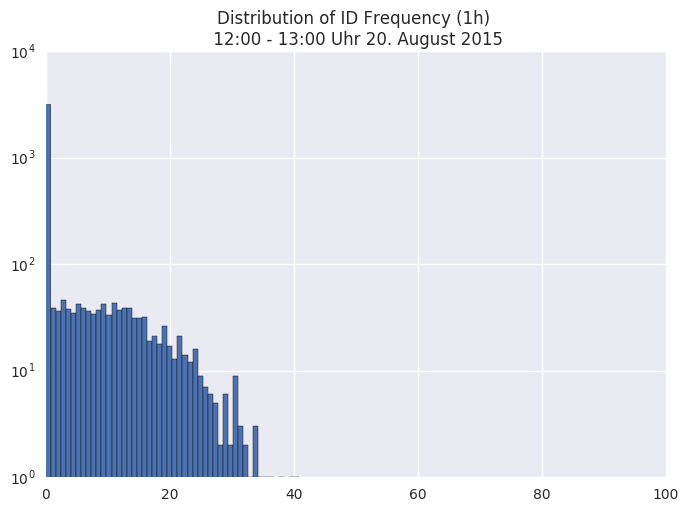

In [18]:
fig, ax = plt.subplots()
dfh.frac.hist(ax=ax, bins=50)
ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_title("Distribution of ID Frequency (1h) \n 12:00 - 13:00 Uhr 20. August 2015")


In [19]:
dfh0 = dfh[dfh.COUNT>0]

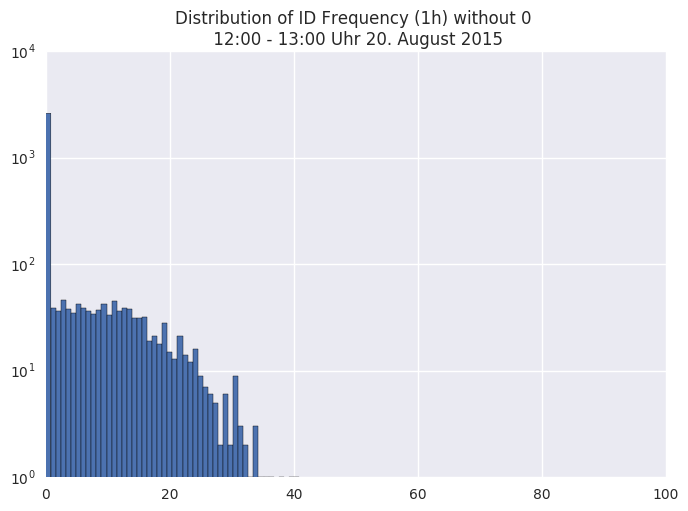

In [20]:
fig, ax = plt.subplots()
dfh0.frac.hist(ax=ax, bins=50)
ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_title("Distribution of ID Frequency (1h) without 0 \n 12:00 - 13:00 Uhr 20. August 2015")

In [21]:
dfh0.shape[0]

3552

In [22]:
100*dfh0.shape[0]/(2**12)

86.71875

In [23]:
c = Counter(dfh0.COUNT.values)

In [24]:
c.values()

dict_values([536, 417, 263, 234, 175, 149, 125, 100, 90, 68, 53, 46, 46, 32, 28, 13, 1, 17, 21, 13, 12, 13, 14, 8, 7, 11, 6, 4, 5, 3, 8, 4, 1, 4, 3, 2, 2, 2, 6, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 4, 1, 2, 1, 2, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 4, 1, 1, 2, 2, 2, 1, 1

In [25]:
dfh01 = dfh0[dfh0.COUNT > 15]

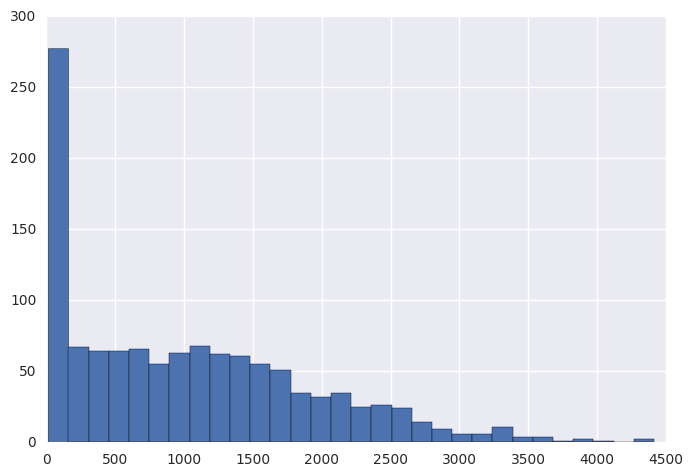

In [26]:
dfh01.COUNT.hist(bins=30)

# Statistik zu einem Tag

In [80]:
dfd = df.query('(MONTH == "08") & (DAY == "30" )')

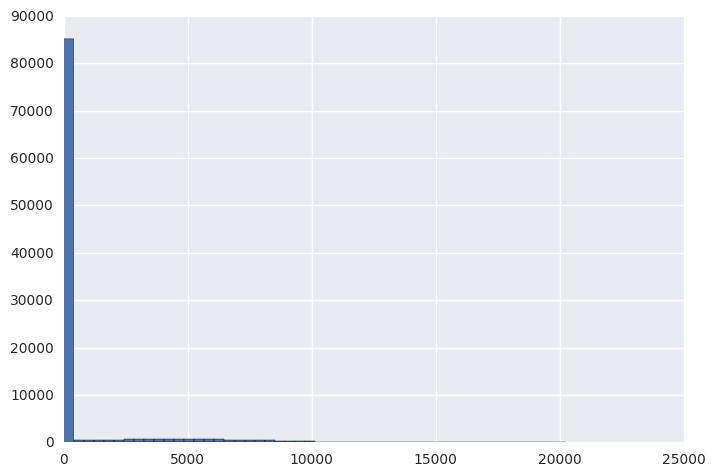

In [81]:
dfd.COUNT.hist(bins=50)

In [82]:
dfd.COUNT.describe()

count    98304.000000
mean       672.750244
std       1951.111652
min          0.000000
25%          1.000000
50%          3.000000
75%         14.000000
max      20271.000000
Name: COUNT, dtype: float64

In [83]:
dfd0 = dfd[dfd.COUNT > 0]

In [84]:
dfd0.head()

,MONTH,DAY,HOUR,ID,COUNT
991232,08,30,00,0,6
991233,08,30,00,1,4
991234,08,30,00,2,2
991236,08,30,00,4,1
991237,08,30,00,5,2


In [85]:
len(np.unique(list(dfd0.ID)))

4094

In [86]:
grouped = dfd0.groupby(by="ID")

In [87]:
for g, gr in grouped:
    if (g == 861):
        print(gr)
        

        MONTH DAY HOUR   ID  COUNT
992093     08  30   00  861      1
996189     08  30   01  861      2
1000285    08  30   02  861      8
1004381    08  30   03  861      8
1008477    08  30   04  861      2
1012573    08  30   05  861      3
1016669    08  30   06  861      5
1028957    08  30   09  861      2
1033053    08  30   10  861      2
1037149    08  30   11  861      3
1041245    08  30   12  861      2
1045341    08  30   13  861      4
1049437    08  30   14  861      4
1053533    08  30   15  861      2
1057629    08  30   16  861      4
1061725    08  30   17  861      1
1065821    08  30   18  861     12
1082205    08  30   22  861      1
1086301    08  30   23  861      8


In [88]:
day = grouped['COUNT'].agg({'summe' : np.sum, 'meann' : np.mean})

In [89]:
day.head(10)

,meann,summe
ID,,
0,7.666667,184
1,5.916667,142
2,6.333333,133
3,10.277778,185
4,3.000000,51
5,7.473684,142
6,19.562500,313
7,8.458333,203
8,15.083333,362


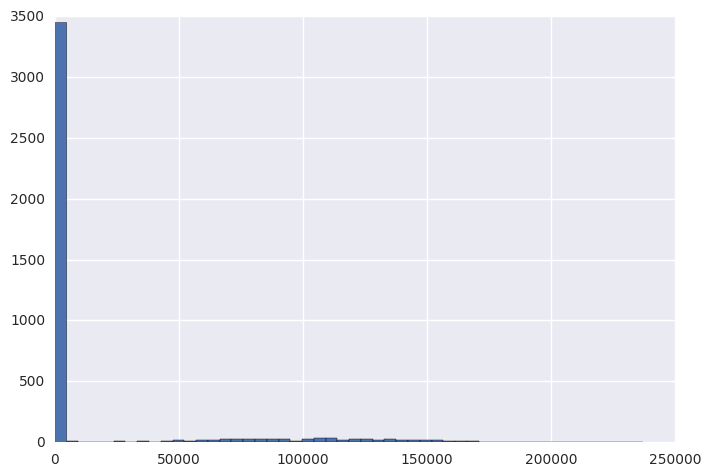

In [90]:
day.summe.hist(bins=50)

In [91]:
day.summe.describe()

count      4094.000000
mean      16153.893503
std       40263.683452
min           1.000000
25%          32.000000
50%         106.000000
75%         407.250000
max      237352.000000
Name: summe, dtype: float64

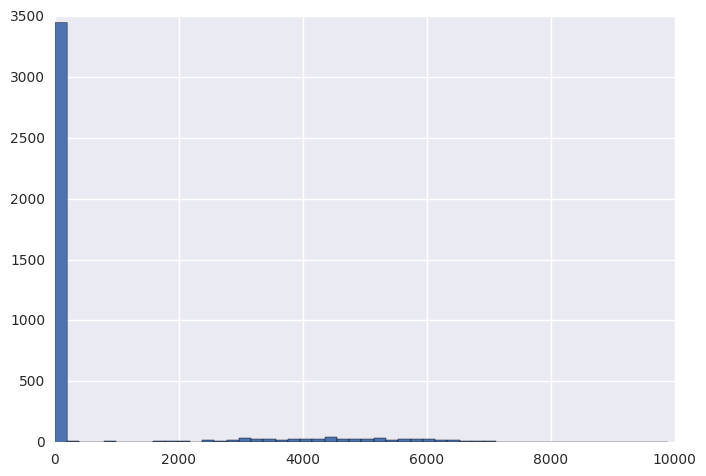

In [92]:
day.meann.hist(bins=50)

In [47]:
ghour = dfd0.groupby(by='HOUR')

In [48]:
data = ghour['ID'].nunique()

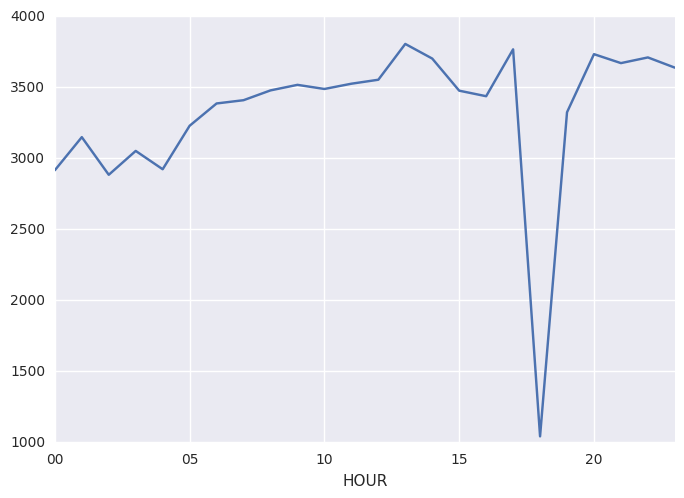

In [49]:
data.plot()

In [50]:
dfd21 = df.query('(MONTH == "08") & (DAY == "21" )')

In [51]:
dfd210 = dfd21[dfd21.COUNT > 0]

In [52]:
len(np.unique(list(dfd210.ID)))

4096

In [53]:
grouped21 = dfd210.groupby(by="ID")

In [54]:
day21 = grouped21['COUNT'].agg({'summe' : np.sum, 'mean' : np.mean})

In [55]:
ghour21 = dfd210.groupby(by='HOUR')

In [56]:
data21 = ghour21['ID'].nunique()

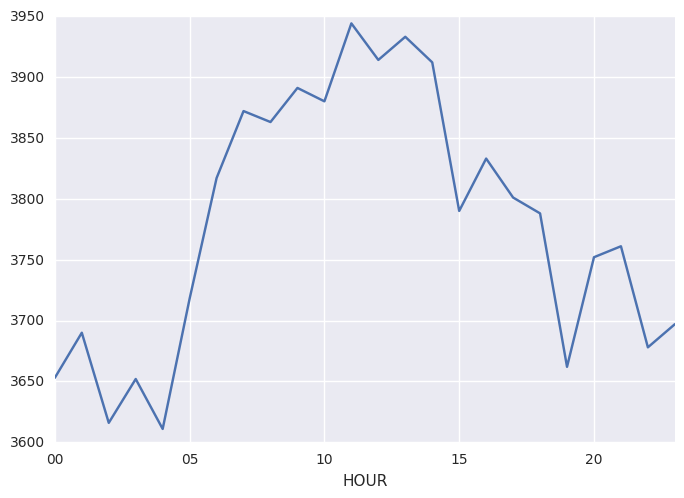

In [57]:
data21.plot()

In [58]:
def plotDayIDs(df, month, day):
    q = "(MONTH == '{}') & (DAY == '{}')".format(month, day)
    dfd = df.query(q)
    dfd0 = dfd[dfd.COUNT > 20]
    print(len(np.unique(list(dfd0.ID))))
    ghour = dfd0.groupby(by='HOUR')
    data = ghour['ID'].nunique()
    fig, ax = plt.subplots()
    data.plot(ax=ax)
    #ax.set_xlim(0,23)
    ax.set_ylim(0,2**12)
    ax.set_title("{}-{}".format(month,day))

1212
2076
2558
2486
2375
2261
2323
2280
1887
2077
2056
1905
1684


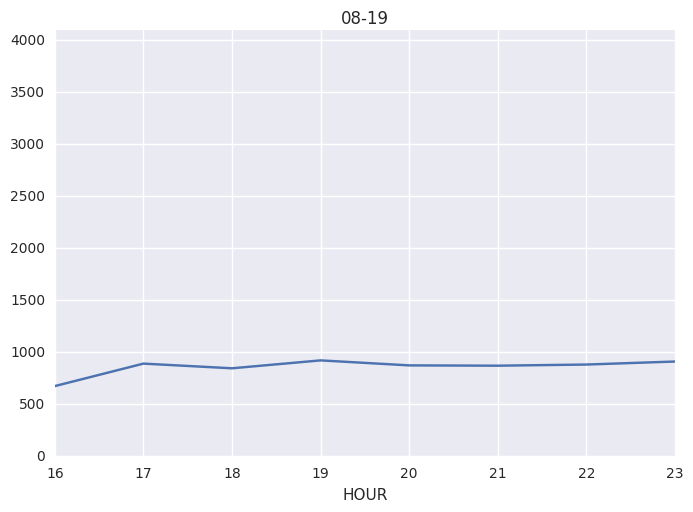

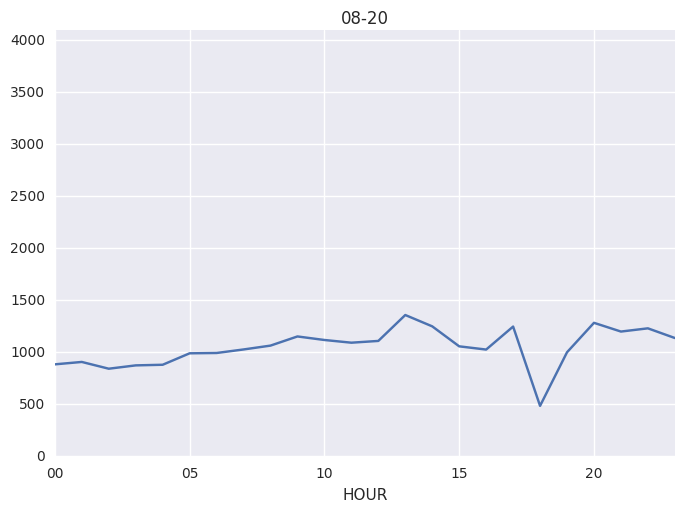

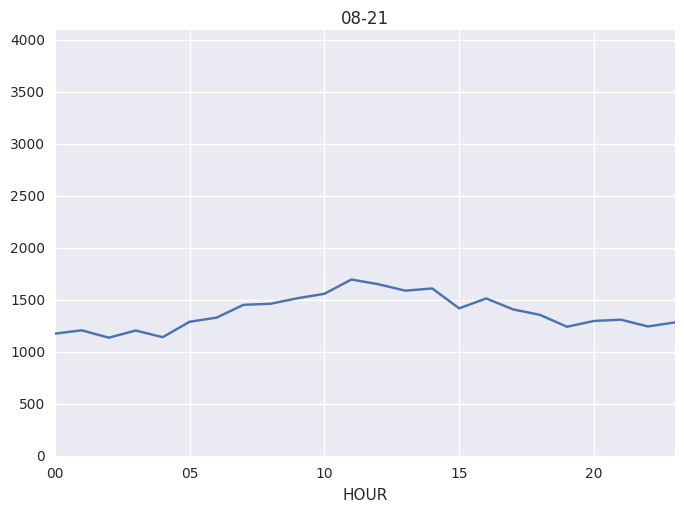

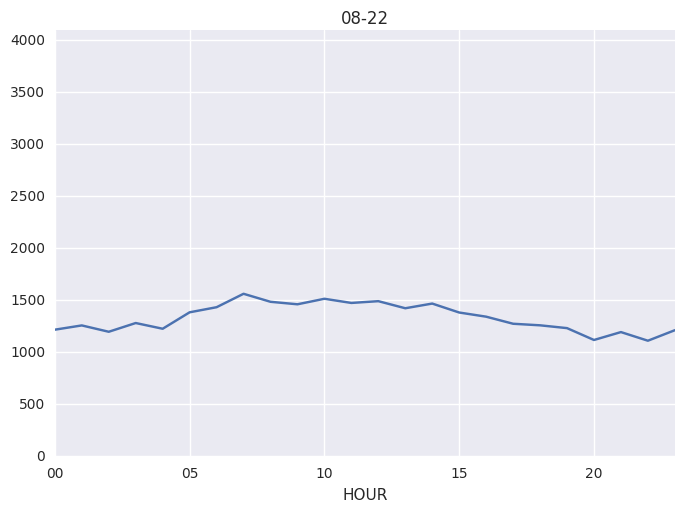

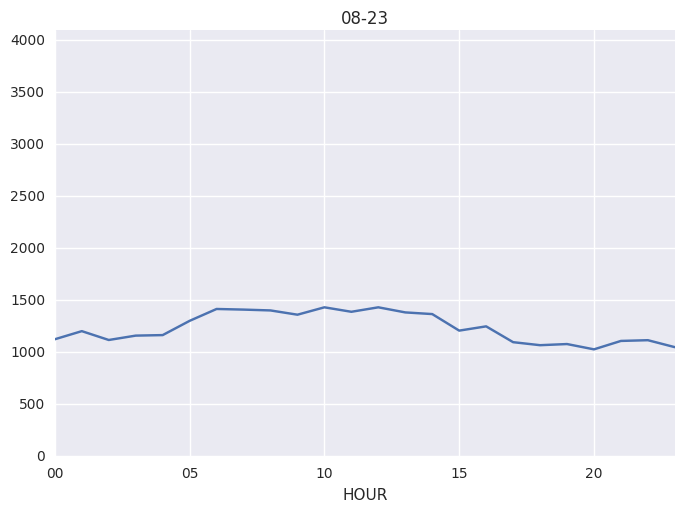

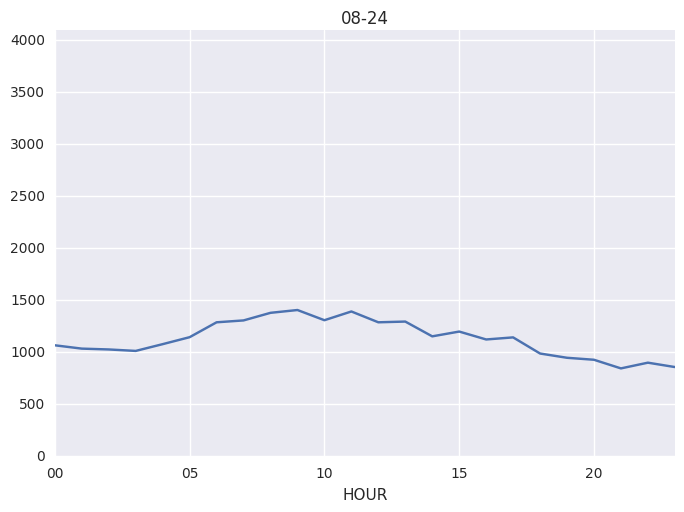

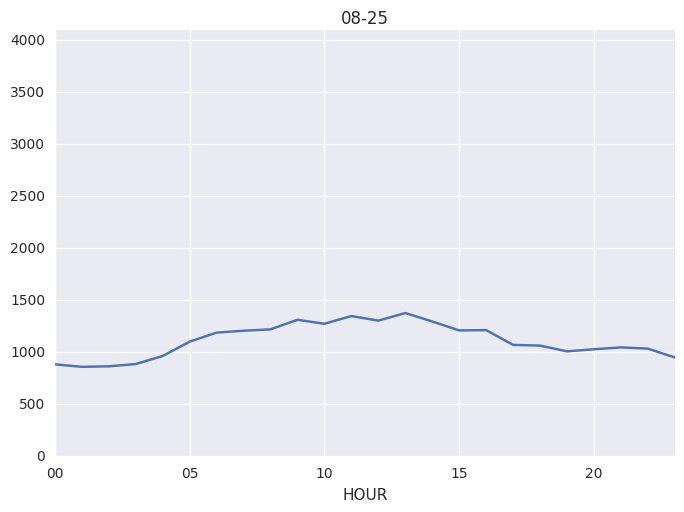

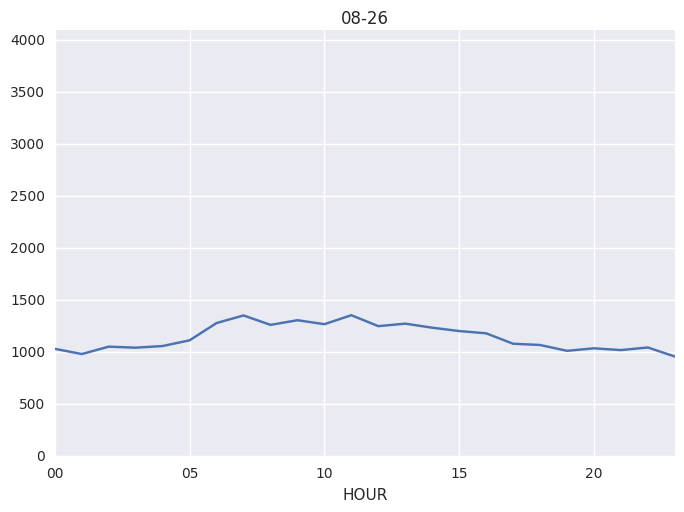

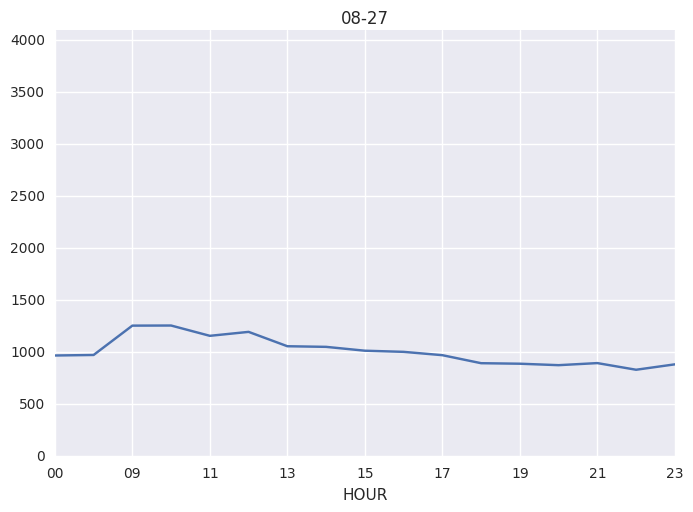

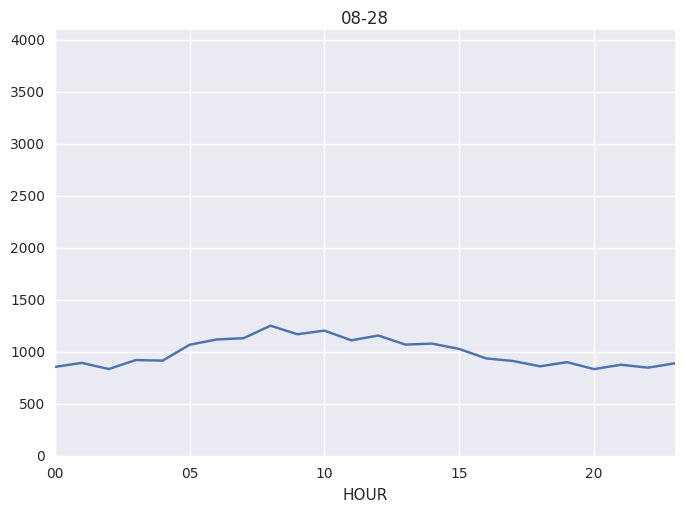

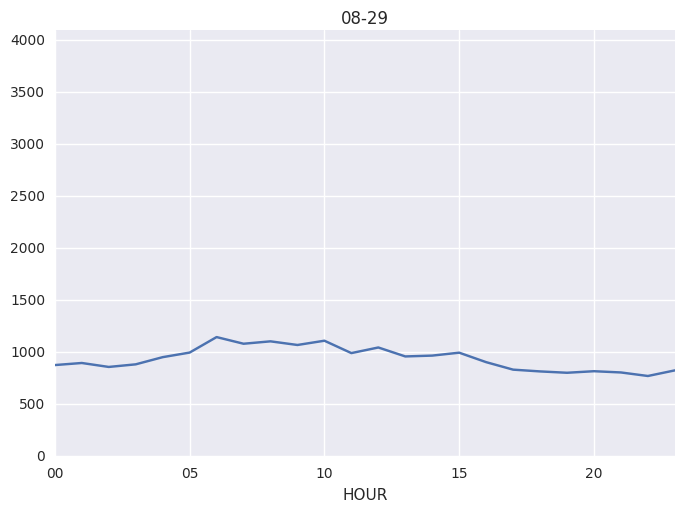

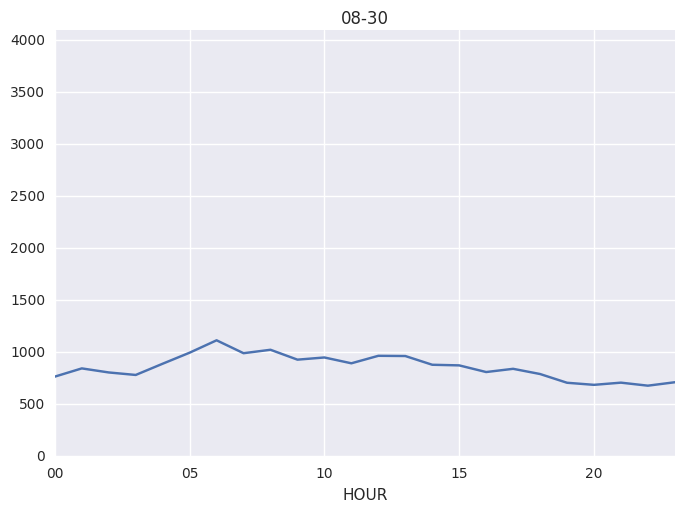

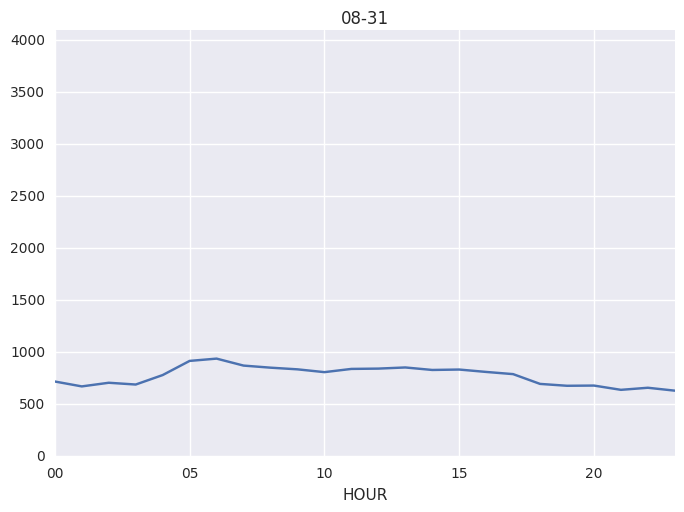

In [59]:
for i in list(range(19,32)):
    i = str(i).zfill(2)
    plotDayIDs(df, "08", i)

In [60]:
#month = "10"
#day = "22"
#q = "(MONTH == '{}') & (DAY == '{}')".format(month, day)
df0 = df[df.COUNT > 20]

In [61]:
grouped = df0.groupby(by=['MONTH', 'DAY'])

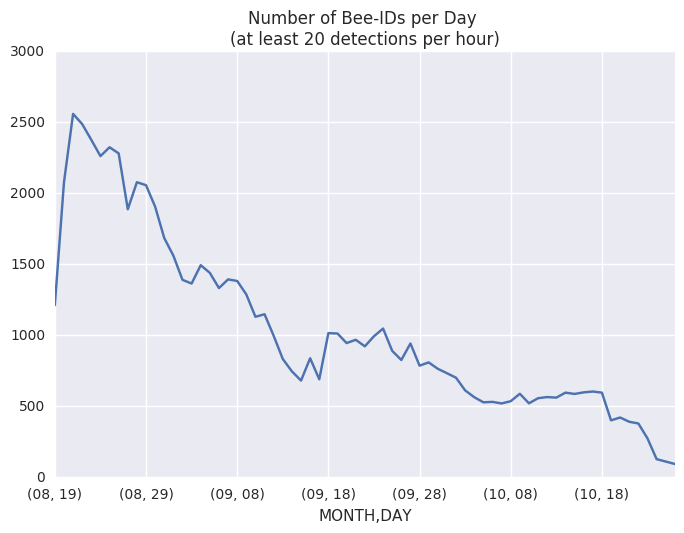

In [65]:
fig, ax = plt.subplots()
grouped.ID.nunique().plot(ax=ax)
ax.set_title("Number of Bee-IDs per Day \n(at least 20 detections per hour)")